In [1]:
import numpy as np
import scipy
import scipy.stats as st
from matplotlib import pyplot as plt
import os

In [342]:
os.chdir('/Users/kraml/Programs/Lilith-Run2database/validation_final/CMS/Run2/36fb-1/HIG-17-023/')
dt = np.dtype([('cx', float), ('cy', float)])
Zll = np.genfromtxt('HIG-17-023_Z(ll)H_invisible_f.txt', dtype=dt)
Vqq = np.genfromtxt('HIG-17-023_V(qq)H_invisible_f.txt', dtype=dt)
ggH = np.genfromtxt('HIG-17-023_ggH_invisible_f.txt', dtype=dt)
qqH = np.genfromtxt('HIG-17-023_qqH_invisible_f.txt', dtype=dt)

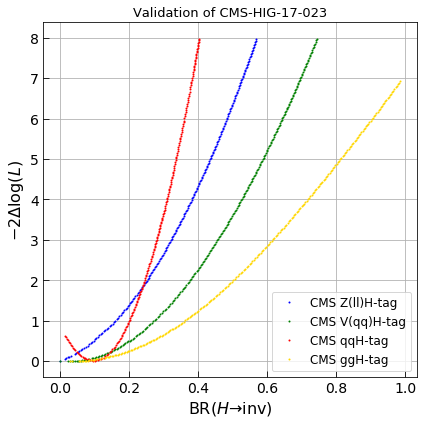

In [258]:
fig = plt.figure(figsize=(6,6))
plt.tick_params(axis='both', direction='in', length=6, which='both', labelsize=14)
plt.grid()

plt.plot(Zll['cx'],Zll['cy'], '.', c='b', ms=2, label='CMS Z(ll)H-tag')
plt.plot(Vqq['cx'],Vqq['cy'], '.', c='g', ms=2, label='CMS V(qq)H-tag')
plt.plot(qqH['cx'],qqH['cy'], '.', c='r', ms=2, label='CMS qqH-tag')
plt.plot(ggH['cx'],ggH['cy'], '.', c='gold', ms=2, label='CMS ggH-tag')

plt.title(r'Validation of CMS-HIG-17-023',fontsize=13)
plt.xlabel(r'BR$(H\to {\rm inv})$',fontsize=16)
plt.ylabel(r'$-2\Delta\log (L)$',fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()

In [343]:
LintZll = scipy.interpolate.UnivariateSpline(Zll['cx'], Zll['cy'], k=4, s=1)
LintVqq = scipy.interpolate.UnivariateSpline(Vqq['cx'], Vqq['cy'], k=4, s=1)
LintqqH = scipy.interpolate.UnivariateSpline(qqH['cx'], qqH['cy'], k=4, s=1)
LintggH = scipy.interpolate.UnivariateSpline(ggH['cx'], ggH['cy'], k=4, s=1)

In [344]:
x1 = np.linspace(0, 0.8, 100, endpoint = True)
x2 = np.linspace(0, 0.2, 40, endpoint = True)

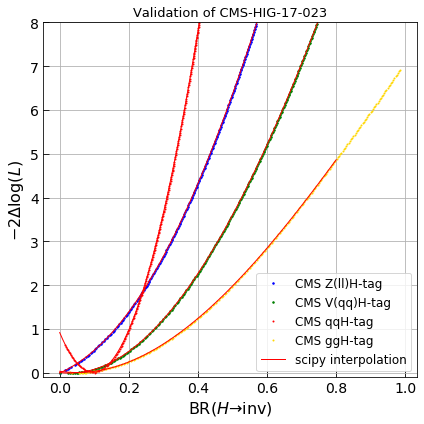

In [272]:
fig = plt.figure(figsize=(6,6))
plt.tick_params(axis='both', direction='in', length=6, which='both', labelsize=14)
plt.grid()

plt.plot(Zll['cx'],Zll['cy'], '.', c='b', ms=3, label='CMS Z(ll)H-tag')
plt.plot(Vqq['cx'],Vqq['cy'], '.', c='g', ms=3, label='CMS V(qq)H-tag')
plt.plot(qqH['cx'],qqH['cy'], '.', c='r', ms=2, label='CMS qqH-tag')
plt.plot(ggH['cx'],ggH['cy'], '.', c='gold', ms=2, label='CMS ggH-tag')

plt.plot( x1, [ LintZll(xi) for xi in x1 ], c='r', ls='-', lw=1, label='scipy interpolation')
plt.plot( x1, [ LintVqq(xi) for xi in x1 ], c='r', ls='-', lw=1)
plt.plot( x1, [ LintqqH(xi) for xi in x1 ], c='r', ls='-', lw=1)
plt.plot( x1, [ LintggH(xi) for xi in x1 ], c='r', ls='-', lw=1)

#plt.xlim([-0.02, 0.2])
plt.ylim([-0.1, 8.])

plt.title(r'Validation of CMS-HIG-17-023',fontsize=13)
plt.xlabel(r'BR$(H\to {\rm inv})$',fontsize=16)
plt.ylabel(r'$-2\Delta\log (L)$',fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()

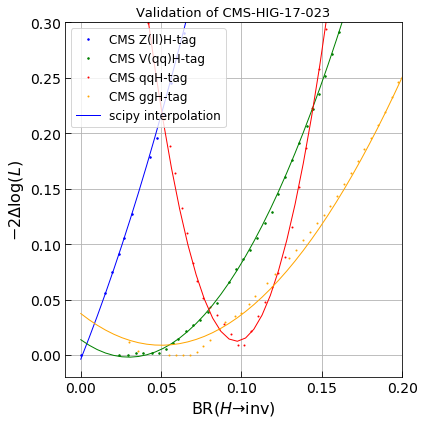

In [351]:
fig = plt.figure(figsize=(6,6))
plt.tick_params(axis='both', direction='in', length=6, which='both', labelsize=14)
plt.grid()

plt.plot(Zll['cx'],Zll['cy'], '.', c='b', ms=3, label='CMS Z(ll)H-tag')
plt.plot(Vqq['cx'],Vqq['cy'], '.', c='g', ms=3, label='CMS V(qq)H-tag')
plt.plot(qqH['cx'],qqH['cy'], '.', c='r', ms=2, label='CMS qqH-tag')
plt.plot(ggH['cx'],ggH['cy'], '.', c='orange', ms=2, label='CMS ggH-tag')

plt.plot( x2, [ LintZll(xi) for xi in x2 ], c='b', ls='-', lw=1, label='scipy interpolation')
plt.plot( x2, [ LintVqq(xi) for xi in x2 ], c='g', ls='-', lw=1)
plt.plot( x2, [ LintqqH(xi) for xi in x2 ], c='r', ls='-', lw=1)
plt.plot( x2, [ LintggH(xi) for xi in x2 ], c='orange', ls='-', lw=1)

plt.xlim([-0.01, 0.2])
plt.ylim([-0.02, 0.3])

plt.title(r'Validation of CMS-HIG-17-023',fontsize=13)
plt.xlabel(r'BR$(H\to {\rm inv})$',fontsize=16)
plt.ylabel(r'$-2\Delta\log (L)$',fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()

In [346]:
LintZll(0.), LintVqq(0.035)

(array(-0.00368568), array(-0.00139556))

In [103]:
from scipy.optimize import fsolve

def solve_bifurcation_f_gamma(m, p, N):
    a = 0.
    b = 1.0/m
    for i in range(N):
        x = (a+b)/2 
        if np.exp(-x*(m+p)) <= (1-m*x)/(1+p*x): 
            a = x
        else:
            b = x
    return a

def PoissonL1D(x, x0, sigm, sigp):
    gamma = solve_bifurcation_f_gamma(sigm,sigp,1000)
    nu = 0.5/(gamma*sigp - np.log(1+gamma*sigp))
    alpha = nu*gamma
    cur_l = -alpha*(x-x0) + nu*np.log(1+alpha*(x-x0)/nu)
    cur_l = -2.*cur_l
    return cur_l

def VN1D(x, x0, sigm, sigp):
    num = x - x0
    den = sigm*sigp + (sigp - sigm)*num
    cur_l = num**2/den
    return cur_l

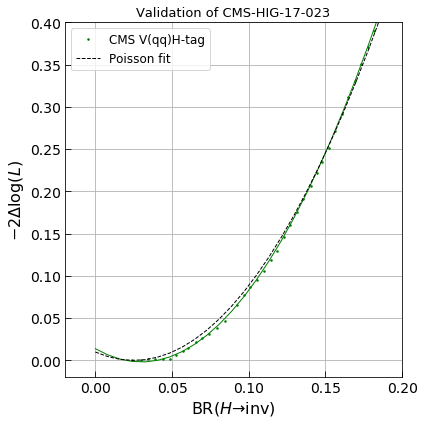

In [349]:
fig = plt.figure(figsize=(6,6))
plt.tick_params(axis='both', direction='in', length=6, which='both', labelsize=14)
plt.grid()

plt.plot(Vqq['cx'],Vqq['cy'], '.', c='g', ms=3, label='CMS V(qq)H-tag')
plt.plot( x1, [ LintVqq(xi) for xi in x1 ], c='g', ls='-', lw=1)
plt.plot( x1, [ PoissonL1D(xi, 0.025, 0.25, 0.253) for xi in x1 ], c='k', ls='--', lw=1, label='Poisson fit')

plt.xlim([-0.02, 0.2])
plt.ylim([-0.02, 0.4])

plt.title(r'Validation of CMS-HIG-17-023',fontsize=13)
plt.xlabel(r'BR$(H\to {\rm inv})$',fontsize=16)
plt.ylabel(r'$-2\Delta\log (L)$',fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()

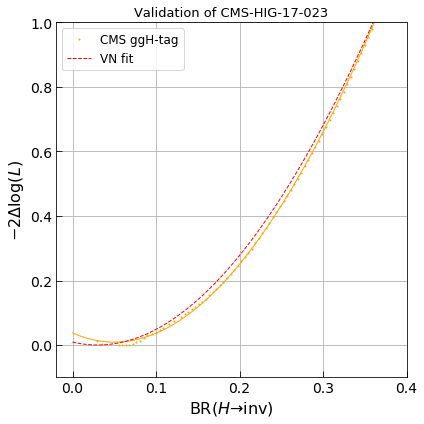

In [404]:
fig = plt.figure(figsize=(6,6))
plt.tick_params(axis='both', direction='in', length=6, which='both', labelsize=14)
plt.grid()

plt.plot(ggH['cx'],ggH['cy'], '.', c='orange', ms=2, label='CMS ggH-tag')
plt.plot( x1, [ LintggH(xi) for xi in x1 ], c='orange', ls='-', lw=1)

#plt.plot( x1, [ PoissonL1D(xi, 0.0, 0.33, 0.35) for xi in x1 ], c='k', ls='--', lw=1, label='Poisson fit')
#plt.plot( x1, [ VN1D(xi, 0.02, 0.35, 0.35) for xi in x1 ], c='k', ls='--', lw=1, label='VN fit')
plt.plot( x1, [ VN1D(xi, 0.03, 0.3, 0.33) for xi in x1 ], c='r', ls='--', lw=1, label='VN fit')

plt.xlim([-0.02, 0.4])
plt.ylim([-0.1, 1])

plt.title(r'Validation of CMS-HIG-17-023',fontsize=13)
plt.xlabel(r'BR$(H\to {\rm inv})$',fontsize=16)
plt.ylabel(r'$-2\Delta\log (L)$',fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()

In [336]:
Zllred = np.genfromtxt('HIG-17-023_Z(ll)H_invisible_f_red.txt', dtype=dt)
LintZll2 = scipy.interpolate.UnivariateSpline(Zllred['cx'], Zllred['cy'], k=4, s=1)

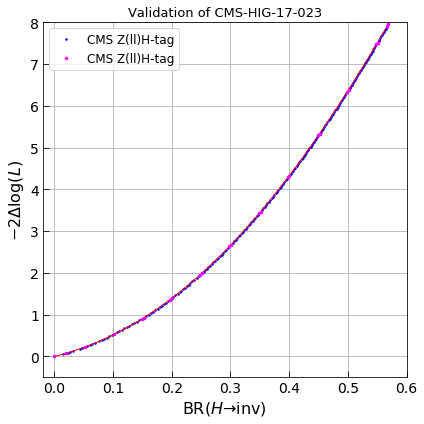

In [341]:
fig = plt.figure(figsize=(6,6))
plt.tick_params(axis='both', direction='in', length=6, which='both', labelsize=14)
plt.grid()

plt.plot(Zll['cx'],Zll['cy'], '.', c='b', ms=3, label='CMS Z(ll)H-tag')
plt.plot( x1, [ LintZll2(xi) for xi in x1 ], c='r', ls='-', lw=1)
plt.plot(Zllred['cx'],Zllred['cy'], '.', c='fuchsia', ms=5, label='CMS Z(ll)H-tag')

plt.xlim([-0.02, 0.6])
plt.ylim([-0.5, 8])

plt.title(r'Validation of CMS-HIG-17-023',fontsize=13)
plt.xlabel(r'BR$(H\to {\rm inv})$',fontsize=16)
plt.ylabel(r'$-2\Delta\log (L)$',fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()

In [338]:
LintZll2(0.)

array(0.0001252)